In [1]:
import sys
import os

# Append the parent directory (src) to sys.path
notebooks_dir = os.path.dirname(os.path.abspath("__file__"))
src_dir = os.path.abspath(os.path.join(notebooks_dir, ".."))
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.text_utils import (
    compute_headline_length,
    plot_headline_length_distribution,
    plot_articles_per_publisher,
    plot_articles_over_time,
    extract_keywords,
    plot_top_keywords
)

In [3]:
# Load your dataset
df = pd.read_csv("../../data/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


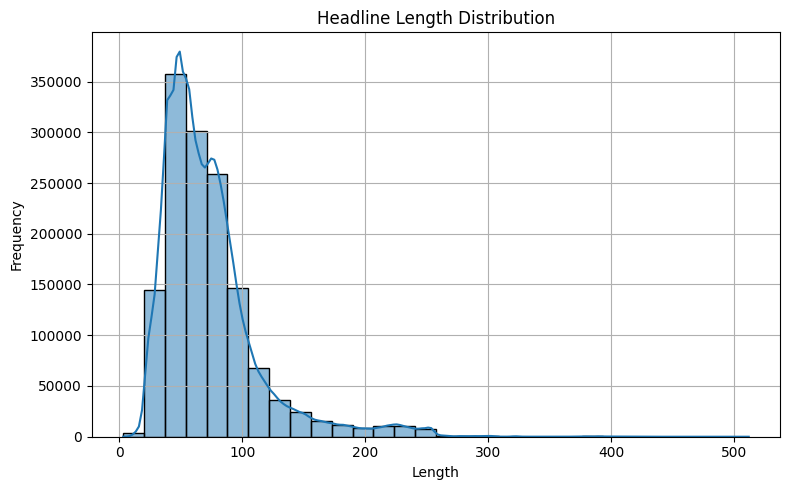

In [4]:
# === 1. Headline Length ===
df = compute_headline_length(df)
plot_headline_length_distribution(df)

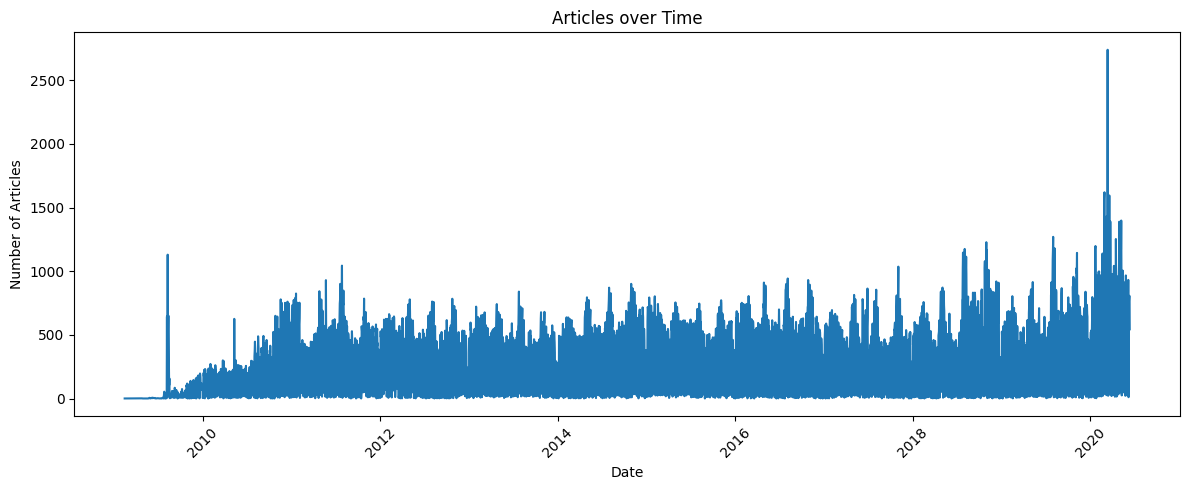

In [5]:
# === 3. Articles by Date ===
plot_articles_over_time(df)

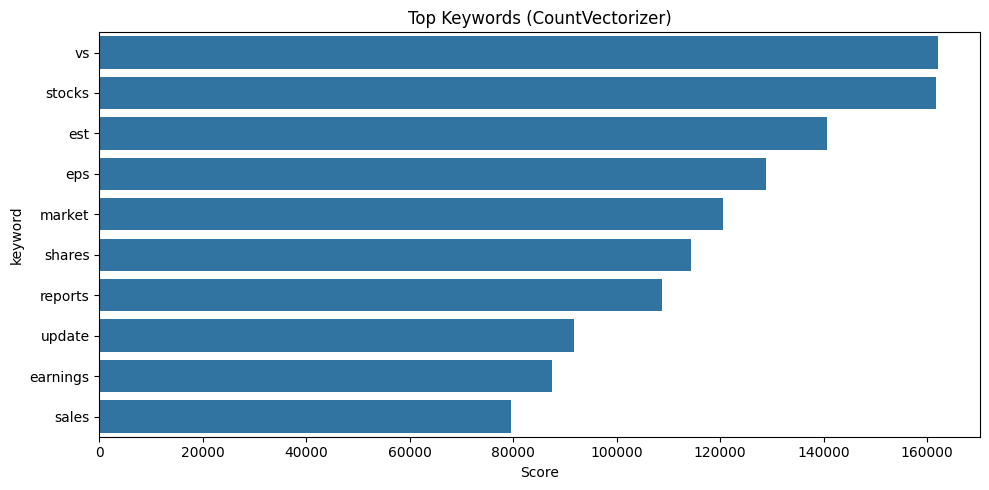

In [6]:
# === 4. Keyword Extraction ===
top_keywords_count = extract_keywords(df, method='count', top_n=10)
plot_top_keywords(top_keywords_count, method='CountVectorizer')

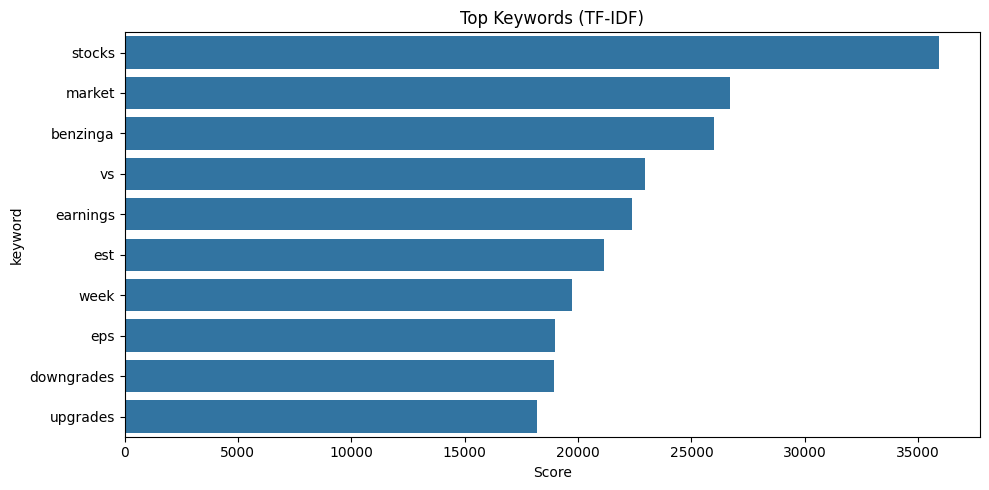

In [7]:
top_keywords_tfidf = extract_keywords(df, method='tfidf', top_n=10)
plot_top_keywords(top_keywords_tfidf, method='TF-IDF')

In [8]:
# === 5. Optional: Publishing Hour or Weekday (Bonus) ===
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True, errors='raise')
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

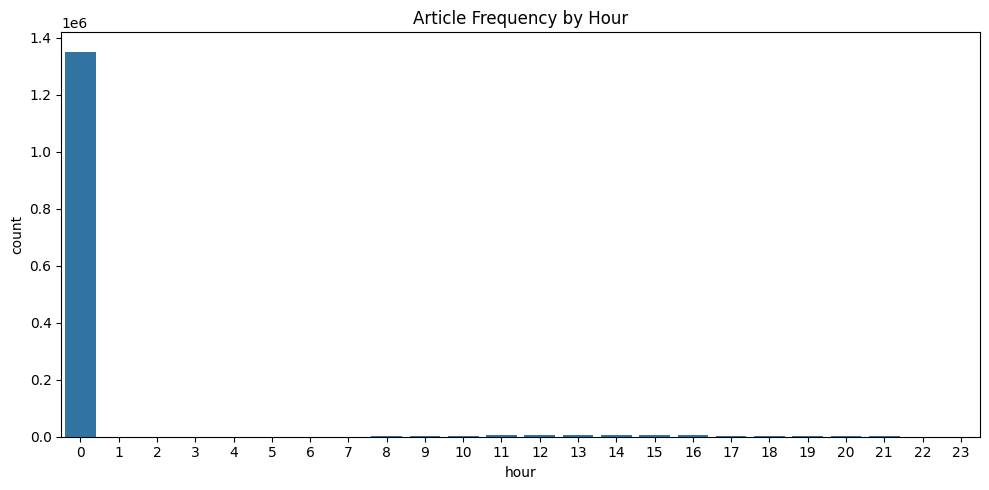

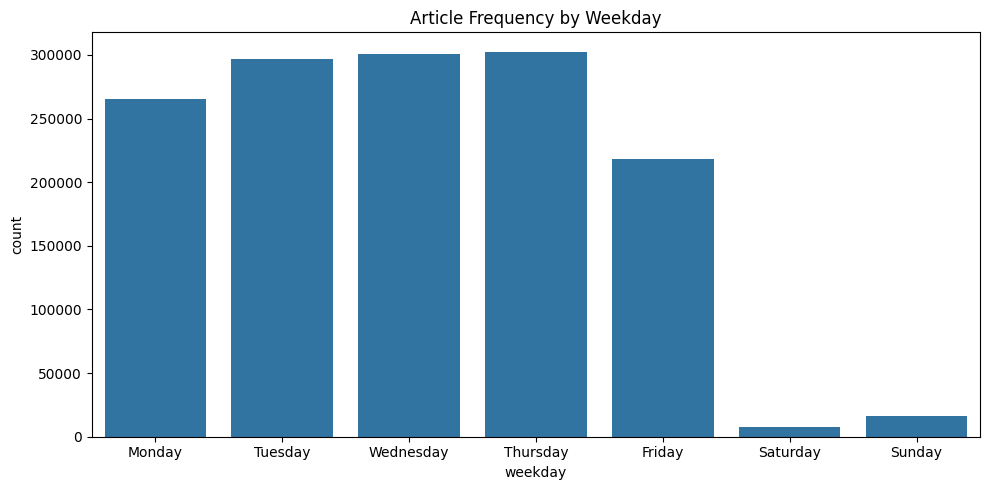

In [11]:
# Plot by hour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour')
plt.title("Article Frequency by Hour")
plt.tight_layout()
plt.show()

# Plot by weekday
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='weekday', order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Article Frequency by Weekday")
plt.tight_layout()
plt.show()